In [1]:
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("spam_mail.csv",encoding='latin-1')
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


# eda
#we have subject and message but we will only use message column as subject has missing values,also message will serve the purpose to classify spam or not spam mail

In [3]:
df.shape

(2893, 3)

In [4]:
#0 stands for not spam emails and 1 stands for spam emails
print ('spam and not spam counts','\n',df.label.value_counts())

spam and not spam counts 
 0    2412
1     481
Name: label, dtype: int64


In [5]:
print ('not spam ratio = ', round(len(df[df['label']==0]) / len(df.label),2)*100,'%')
print ('spam ratio  = ', round(len(df[df['label']==1]) / len(df.label),2)*100,'%')

not spam ratio =  83.0 %
spam ratio  =  17.0 %


In [6]:
df['length'] = df.message.str.len()
df.head(5)

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [7]:
def make_Dictionary(df):
    messages = (df['message'])
    all_words = []       
    for message in message:    
        with open(message) as m:
            for i,line in enumerate(m):
                if i == 2:  #Body of email is only 3rd line of text file
                    words = line.split()
                    all_words += words
            dictionary = Counter(all_words)
            return dictionary
    
   

In [8]:
from nltk.tokenize import word_tokenize
import string

import nltk.corpus
import string
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

In [9]:
nltk.download('punkt')
punct =string.punctuation

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\COMP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\COMP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# cleaning data

In [72]:
stop_words = set(stopwords.words('english') + ['ü','ur','4','2','im','dont','doin','ure','i','and','on','us','would','apple-iss','one','also','c','e'])
punct =string.punctuation 


df['message'] = df['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
df['message'] = df['message'].str.replace(r'^www\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
df['message'] = df['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in punct))
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', ' ')
df['message']=df['message'].apply(lambda x: str(x))
df['message'] = df['message'].str.replace("'",' ')
df['message'] = df['message'].str.replace("-",' ')









from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer() 
def convert(text):     
    lemmatized_text = []     
    for i in text.split():         
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(i,pos="v")))     
        return ' '.join(lemmatized_text)  
    df['message'] = df['message'].apply(lambda x: convert(x)) 




In [13]:
df['message']#converting to string so we can split words and make dictionary

0       content length    research center    million j...
1       lang classification grimes joseph e barbara f ...
2       posting inquiry sergei atamas satamas umabnet ...
3       colleague researching differing degrees risk p...
4       earlier morning phone friend mine living south...
                              ...                        
2888    hello thanks stopping taken many new pics made...
2889    list owner kiddin invited join mailing list li...
2890    judging return post must sounded like kind sel...
2891    gotcha two separate fallacies argument n ary c...
2892    hello working thesis concerning attitudes towa...
Name: message, Length: 2893, dtype: object

In [14]:
df['clean_length'] = df.message.str.len()

df.head(5)

,subject,message,label,length,clean_length
0,job posting - apple-iss research center,content length research center million j...,0,2856,1991
1,NaN,lang classification grimes joseph e barbara f ...,0,1800,1371
2,query : letter frequencies for text identifica...,posting inquiry sergei atamas satamas umabnet ...,0,1435,975
3,risk,colleague researching differing degrees risk p...,0,324,206
4,request book information,earlier morning phone friend mine living south...,0,1046,619


In [ ]:
#SPAM MAILS ARE IN SHORT NUMBER THAN NOT SPAM MAILS

In [15]:
print ('Origian Length', df.length.sum())
print ('Clean Length', df.clean_length.sum())

Origian Length 9070005
Clean Length 6097070


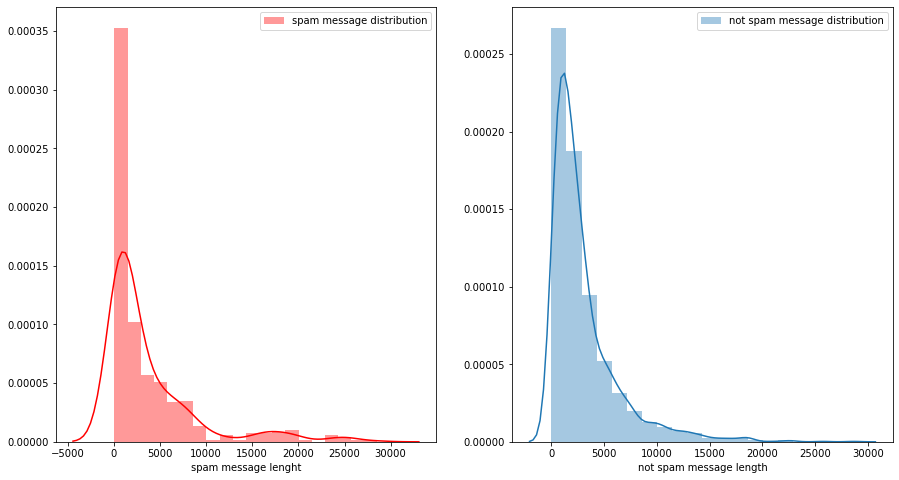

In [16]:
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['length'],bins=20,ax=ax[0],label='spam message distribution',color='r')

ax[0].set_xlabel('spam message lenght')
ax[0].legend()

sns.distplot(df[df['label']==0]['length'],bins=20,ax=ax[1],label='not spam message distribution')
ax[1].set_xlabel('not spam message length')
ax[1].legend()

plt.show()

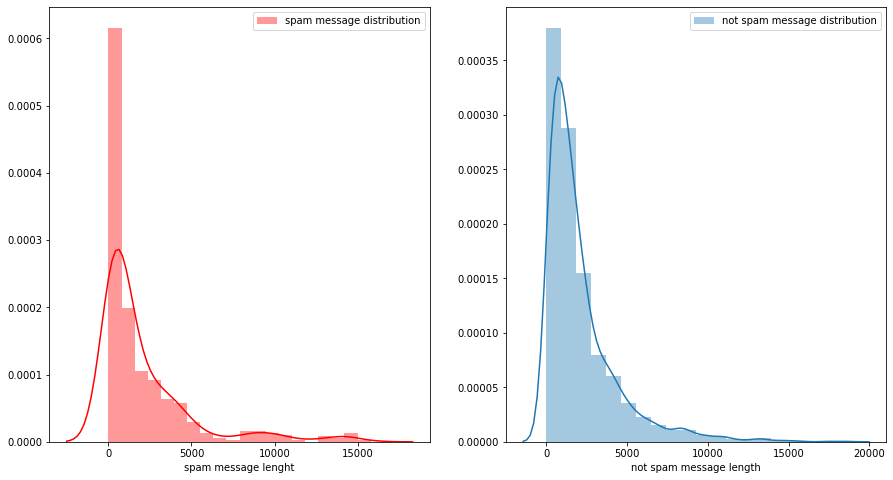

In [17]:
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['clean_length'],bins=20,ax=ax[0],label='spam message distribution',color='r')

ax[0].set_xlabel('spam message lenght')
ax[0].legend()

sns.distplot(df[df['label']==0]['clean_length'],bins=20,ax=ax[1],label='not spam message distribution')
ax[1].set_xlabel('not spam message length')
ax[1].legend()

plt.show()

In [73]:
words=[]
for word in df['message'].str.split(' '):
    words.append(word)
#lets make dictionary of these words

In [74]:
doc = df["message"].tolist()

# dictionary
we can analyse with the dictionary that the data is somewhat related to university,course,langauge

In [20]:
import gensim

In [75]:
dictionary = gensim.corpora.Dictionary(words)

In [76]:
print(dictionary)
#

Dictionary(53927 unique tokens: ['acoustic', 'advantage', 'analysis', 'apple', 'apply']...)


In [77]:
count=0
for k,v in dictionary.iteritems():
    print (k, v)
    count +=1
    if count >40:
        break

0 acoustic
1 advantage
2 analysis
3 apple
4 apply
5 areas
6 art
7 attendance
8 based
9 benefits
10 breaking
11 cache
12 california
13 candidate
14 candidates
15 center
16 chinese
17 competitive
18 compilers
19 complete
20 computational
21 computer
22 conferences
23 contact
24 content
25 corpus
26 cupertino
27 database
28 degree
29 design
30 desirable
31 efforts
32 email
33 enclosing
34 encouraged
35 engineering
36 english
37 expenses
38 experienc
39 experience
40 experienced


In [24]:
#we can also have a look at dictionary token id but that will be a very long list
#import pprint
#pprint.pprint(dictionary.token2id)

In [25]:
from gensim.models import Word2Vec
import gensim

# Converts into tokens (Alternative to word_tokenize)
from gensim.utils import simple_preprocess


In [26]:
from gensim import corpora
tokens = [[token for token in sentence.split()] for sentence in doc]

gensim_dictionary = corpora.Dictionary()
gensim_corpus = [gensim_dictionary.doc2bow(token, allow_update=True) for token in tokens]



In [27]:
import pprint


In [28]:
from gensim import models
import numpy as np

tfidf = models.TfidfModel(gensim_corpus, smartirs='ntc')

#for sent in tfidf[gensim_corpus]:
    #pprint.pprint([[gensim_dictionary[id], np.around(frequency, decimals=2)] for id, frequency in sent])
    #we can also have a look at frequency in decimal

In [29]:
word_frequencies = [[(gensim_dictionary[id], frequence) for id, frequence in couple] for couple in gensim_corpus]


In [79]:
#pprint.pprint(word_frequencies)#frequency of each word in our dictionary

In [31]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(doc)) 
texts=listToString(doc)

In [67]:
from nltk.tokenize import word_tokenize

tokenized_word=word_tokenize(texts)
stoplist=['s','de','e','n','t']


In [68]:
from nltk.probability import FreqDist
filtered_tokenized_text = [word for word in tokenized_word if word not in stoplist]

fdist = FreqDist(filtered_tokenized_text)


# frequency of words and plotting the most common words

In [69]:
#lets have a look at most common words
fdist.most_common(5)

[('language', 6132),
 ('university', 6090),
 ('linguistics', 3110),
 ('mail', 3077),
 ('information', 3007)]

In [70]:
#when we do the indexing in such a way to see last 3 words we find the 3 most uncoomon words
fdist.most_common()[-3:]

[('pharmacist', 1), ('chemist', 1), ('lollies', 1)]

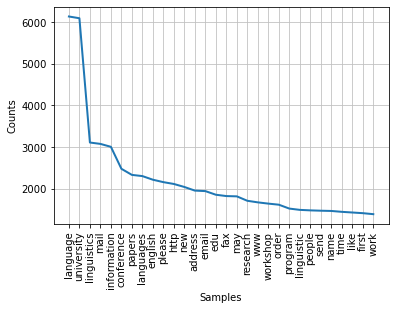

In [71]:
#plotting a graph to see most frequent 30 words
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

# WORD CLOUD

In [ ]:
#word cloud for spam mails (as we can see free,offer like words)

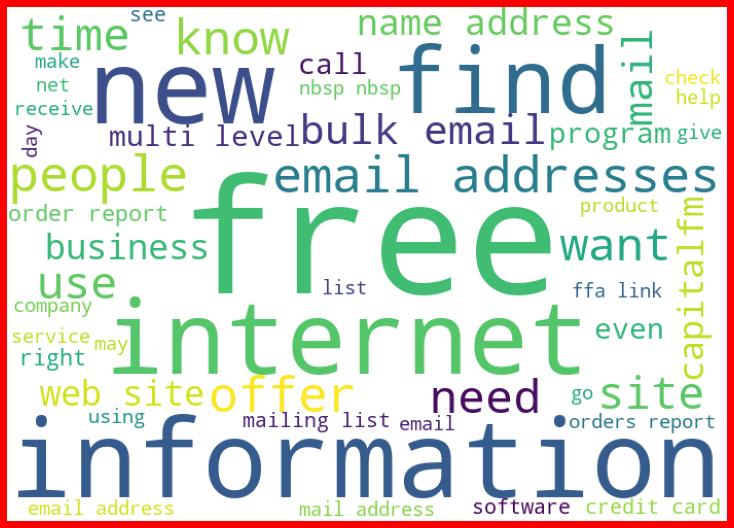

In [78]:
 from wordcloud import WordCloud


spams = df['message'][df['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#word cloud for not spam mails

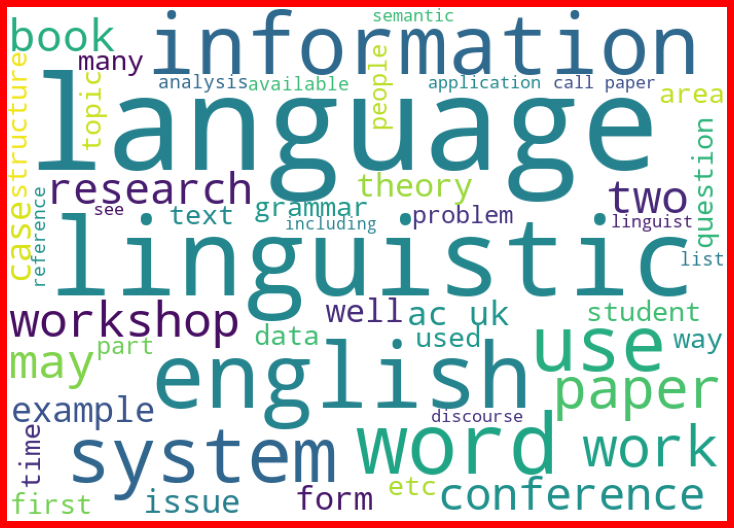

In [38]:
from wordcloud import WordCloud


spams = df['message'][df['label']==0]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# PREDICTIONS USING DIFFERENT CLASSIFICATION MODELS

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer()

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(df['message'])

X = features
y = df['label']


In [40]:

X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)
naive = MultinomialNB()

naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.8439226519337016


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       585
           1       1.00      0.19      0.32       139

    accuracy                           0.84       724
   macro avg       0.92      0.59      0.61       724
weighted avg       0.87      0.84      0.80       724



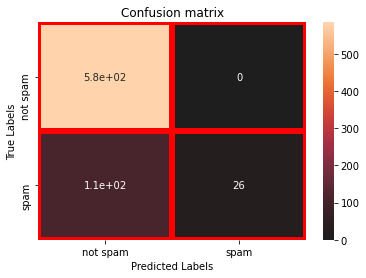

In [42]:
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

In [43]:
conf_mat

array([[585,   0],
       [113,  26]], dtype=int64)

In [44]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,Y_train)

LogisticRegression()

In [45]:
pred=lg.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,pred))

accuracy_score: 0.9392265193370166


In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       585
           1       1.00      0.68      0.81       139

    accuracy                           0.94       724
   macro avg       0.97      0.84      0.89       724
weighted avg       0.94      0.94      0.93       724



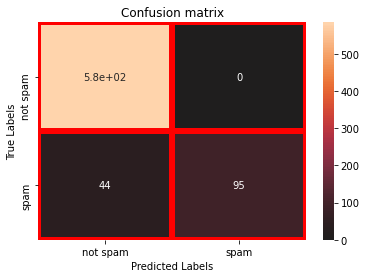

In [47]:
conf_mat = confusion_matrix(y_test,pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

In [48]:
conf_mat

array([[585,   0],
       [ 44,  95]], dtype=int64)

In [49]:
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier()
dct.fit(X_train,Y_train)
preddct=dct.predict(x_test)
print(classification_report(y_test,preddct))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       585
           1       0.78      0.85      0.81       139

    accuracy                           0.92       724
   macro avg       0.87      0.90      0.88       724
weighted avg       0.93      0.92      0.93       724



In [50]:
conf_mat = confusion_matrix(y_test,preddct)
conf_mat

array([[551,  34],
       [ 21, 118]], dtype=int64)

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
rf_predict=rf.predict(x_test) 
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       585
           1       0.98      0.86      0.91       139

    accuracy                           0.97       724
   macro avg       0.97      0.93      0.95       724
weighted avg       0.97      0.97      0.97       724



In [52]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=7)
ad.fit(X_train,Y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.9530386740331491
[[574  11]
 [ 23 116]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       585
           1       0.91      0.83      0.87       139

    accuracy                           0.95       724
   macro avg       0.94      0.91      0.92       724
weighted avg       0.95      0.95      0.95       724



In [53]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(X_train,Y_train)
svc.score(x_test,y_test)

0.9668508287292817

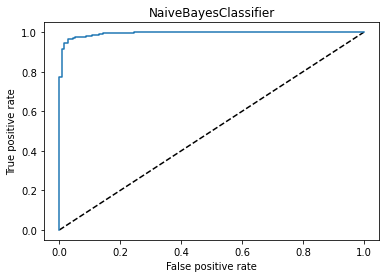

In [54]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
y_pred_prob=naive.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='NaiveBayesClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('NaiveBayesClassifier')
plt.show()

In [55]:
auc_score=roc_auc_score(y_test,naive.predict(x_test))
auc_score

0.5935251798561151

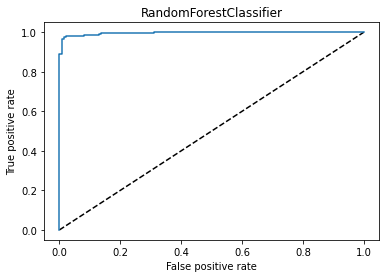

In [56]:
y_pred_prob=rf.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

In [57]:
auc_score=roc_auc_score(y_test,svc.predict(x_test))
auc_score

0.9136690647482014

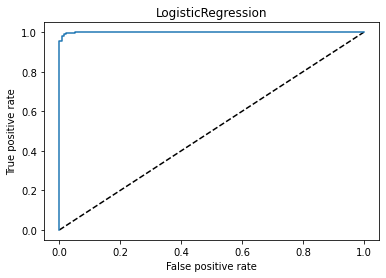

In [58]:
y_pred_prob=lg.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LogisticRegression')
plt.show()

In [59]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))
auc_score

0.841726618705036

In [60]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))
auc_score

0.925493451392732

In [ ]:
#RANDOM FOREST WORKS WELL WITH 90 ABOVE ACCURACY AS WELL AS ROC_AUC SCORE,ALSO SVC,ADA BOOST,LOGISTIC REGRESSION ALSO WORKS WELL WITH OUR MODEL ,PREDICTING THE not SPAM Messages ALMOST ACCURATE,whereas spam messages are in less number so less data thereby they are not fully correctly predicted